# k-means Clustering

ドキュメント：[K-Means Clustering](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/k-means.html)  
APIドキュメント：[H2OKMeansEstimator](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2okmeansestimator)

In [1]:
import h2o
from h2o.estimators.kmeans import H2OKMeansEstimator

print(h2o.__version__)

3.36.0.4


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt

### 擬似データの作成  
- 2次元の擬似データ（３クラスター）を作成し、プロット
- 3つのクラスターの中心点は[[-5,-5], [0,5], [5,-5]]

In [26]:
# 擬似データ（３つの中心点を指定して乱数で作成）の作成
X, labels_true = make_blobs(
    n_samples=1500,                      # サンプル数
    centers=[[-5,-5], [0,5], [5,-5]],   # クラスタ重心座標設定(3クラスタを2次元で作成)
    cluster_std=3,                         # 乱数生成時の標準偏差
    random_state=0)
print('Xの次元: ', X.shape)
pd.DataFrame(np.c_[X, labels_true], columns=["X0","X1","label"]).head()

Xの次元:  (1500, 2)


,X0,X1,label
0,5.136916,2.623655,1.0
1,7.478377,-5.173270,2.0
2,1.378755,5.840174,1.0
3,-3.588701,-4.065659,0.0
4,-3.655414,0.088545,0.0


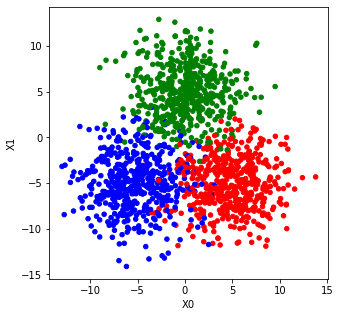

In [27]:
# クラスターを色分けしてプロット
df = pd.DataFrame(np.hstack([X,labels_true.reshape(len(labels_true),1)]), columns=["X0","X1","label"])
col = df.label.map({0:'b', 1:'g', 2:'r'})
df.plot(x='X0', y='X1', kind='scatter', c=col, colorbar=False, figsize=(5,5))
plt.show()

### H2OKMeansEstimatorによるクラスタリング

In [28]:
# H2Oの開始
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,20 mins 04 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,2 months and 24 days
H2O_cluster_name:,H2O_from_python_YShimada_MBP16_zcu7fw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8.000 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


#### クラスター数を指定し、クラスタリングを実施

In [29]:
# データの準備： pandas DataFrameからH2O Frameへ変換
print(type(df))
df_h2o = h2o.H2OFrame.from_python(df)
print(type(df_h2o))

df_h2o

<class 'pandas.core.frame.DataFrame'>
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
<class 'h2o.frame.H2OFrame'>


X0,X1,label
5.13692,2.62365,1
7.47838,-5.17327,2
1.37875,5.84017,1
-3.5887,-4.06566,0
-3.65541,0.0885447,0
-3.15776,-2.23338,0
4.55709,-1.60456,2
-4.80045,-4.09258,0
0.649452,-9.04328,0
6.48985,-1.9636,2


In [30]:
# クラスター数（k）を明示的に指定し、モデルインスタンスを作成
km_k3 = H2OKMeansEstimator(standardize=True, 
                                                        estimate_k=False,       # クラスター数の推定を実施するかどうか
                                                        k=3,                               # クラスター数の指定
                                                        seed=123)
km_k3

No model trained yet


In [31]:
# モデル学習（クラスター中心点の推定）
km_k3.train(x=["X0","X1"], training_frame=df_h2o)
km_k3

kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1656030886969_2


Model Summary: 


,,number_of_rows,number_of_clusters,number_of_categorical_columns,number_of_iterations,within_cluster_sum_of_squares,total_sum_of_squares,between_cluster_sum_of_squares
0,,1500.0,3.0,0.0,7.0,838.863783,2998.0,2159.136217




ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 838.8637840019569
Total Sum of Square Error to Grand Mean: 2998.000005680511
Between Cluster Sum of Square Error: 2159.136221678554

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,491.0,271.723761
1,,2.0,514.0,283.424398
2,,3.0,495.0,283.715626



Scoring History: 


,,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
0,,2022-06-24 09:54:53,0.005 sec,0.0,NaN,NaN
1,,2022-06-24 09:54:53,0.012 sec,1.0,1500.0,2188.208893
2,,2022-06-24 09:54:53,0.015 sec,2.0,198.0,977.289399
3,,2022-06-24 09:54:53,0.017 sec,3.0,66.0,860.884308
4,,2022-06-24 09:54:53,0.020 sec,4.0,32.0,842.698848
5,,2022-06-24 09:54:53,0.022 sec,5.0,8.0,839.068312
6,,2022-06-24 09:54:53,0.024 sec,6.0,2.0,838.875864
7,,2022-06-24 09:54:53,0.026 sec,7.0,0.0,838.863783


In [32]:
# モデルパラメータの確認
km_k3.actual_params

{'model_id': 'KMeans_model_python_1656030886969_2',
 'training_frame': 'Key_Frame__upload_a7b7a3604742f54e6d1cffa0bef94845.hex',
 'validation_frame': None,
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': None,
 'fold_column': None,
 'ignored_columns': ['label'],
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'k': 3,
 'estimate_k': False,
 'user_points': None,
 'max_iterations': 10,
 'standardize': True,
 'seed': 123,
 'init': 'Furthest',
 'max_runtime_secs': 0.0,
 'categorical_encoding': 'Enum',
 'export_checkpoints_dir': None,
 'cluster_size_constraints': None}

In [33]:
# 各クラスターの中心点
km_k3.centers()
# ほぼほぼ一致

[[-5.412334893253637, -5.188529274670621],
 [4.839466557029585, -4.960123322911371],
 [-0.022415211001095184, 5.110166507152485]]

In [34]:
# データへのクラスター番号付与（予測）
pred_k3 = km_k3.predict(df_h2o)

# 結果と元データを結合
df_h2o_res = df_h2o.concat(pred_k3)
df_h2o_res.head(8)

kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


X0,X1,label,predict
5.13692,2.62365,1,2
7.47838,-5.17327,2,1
1.37875,5.84017,1,2
-3.5887,-4.06566,0,0
-3.65541,0.0885447,0,0
-3.15776,-2.23338,0,0
4.55709,-1.60456,2,1
-4.80045,-4.09258,0,0


In [37]:
# 集計によるクラスター分け結果の確認
grouped = df_h2o_res.group_by(by=["label", "predict"])
grouped.count()
grouped.get_frame()

label,predict,nrow
0,0,464
0,1,23
0,2,13
1,0,7
1,1,14
1,2,479
2,0,20
2,1,477
2,2,3


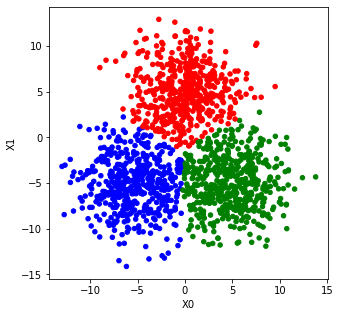

In [40]:
# クラスター分析結果をプロット
df2 = df_h2o_res.as_data_frame()
col = df2['predict'].map({0:'b', 1:'g', 2:'r'})
df2.plot(x='X0', y='X1', kind='scatter', c=col, colorbar=False, figsize=(5,5))
plt.show()

### クラスター数の推定
ドキュメント: [Estimating k in K-Means](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/k-means.html#estimating-k-in-k-means)

In [62]:
km_auto = H2OKMeansEstimator(standardize=True, 
                                                           estimate_k=True,    # クラスター数の推定を実施
                                                           nfolds=5,                   # k分割交差検証。検証データにおける結果がストップ指標となると考えられる
                                                           k=10)                       # 探索する最大クラスター数を指定する

km_auto.train(x=["X0","X1"], 
                          training_frame=df_h2o)
km_auto

kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1656030886969_10


Model Summary: 


,,number_of_rows,number_of_clusters,number_of_categorical_columns,number_of_iterations,within_cluster_sum_of_squares,total_sum_of_squares,between_cluster_sum_of_squares
0,,1500.0,1.0,0.0,2.0,2998.0,2998.0,0.0




ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 2998.000002217157
Total Sum of Square Error to Grand Mean: 2998.000005680511
Between Cluster Sum of Square Error: 3.463354005361907e-06

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,1500.0,2998.000002



ModelMetricsClustering: kmeans
** Reported on cross-validation data. **

Total Within Cluster Sum of Square Error: 3007.0773591745474
Total Sum of Square Error to Grand Mean: 2998.000005680511
Between Cluster Sum of Square Error: -9.077353494036288
Centroid stats are not available.

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,betweenss,-4.962688,5.163679,-13.970062,-2.139242,-2.645653,-4.562964,-1.495519
1,mse,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,rmse,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
3,tot_withinss,601.415470,32.299313,637.045300,582.307740,568.716250,635.372000,583.636050
4,totss,596.452760,28.645258,623.075200,580.168500,566.070600,630.809100,582.140560



Scoring History: 


,,timestamp,duration,iterations,number_of_clusters,number_of_reassigned_observations,within_cluster_sum_of_squares
0,,2022-06-24 10:18:30,0.076 sec,0.0,0.0,NaN,NaN
1,,2022-06-24 10:18:30,0.079 sec,1.0,1.0,1500.0,4277.031601
2,,2022-06-24 10:18:30,0.080 sec,2.0,1.0,0.0,2998.000000


結果は１クラスター。自動ではうまく推定されていない。ストップ基準に引っかかったと思われる

In [64]:
# クラスターの中心点
km_auto.centers()

[[-0.12071076781324747, -1.7116925605328273]]

### 他データでトライ

In [65]:
fm_titanic = h2o.import_file("https://h2oai-jpn-public.s3.amazonaws.com/sample-data/titanic/TitanicData2.csv")
fm_titanic.shape

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


(1309, 15)

In [67]:
fm_titanic_km = fm_titanic[['age', 'sex', 'pclass']]
fm_titanic_km.head()

age,sex,pclass
39,male,3rd
15,female,3rd
26,male,2nd
23,male,3rd
20,male,3rd
44,female,2nd
nan,female,3rd
30,male,2nd
26,male,3rd
25,female,3rd


In [72]:
fm_titanic_km.types

{'age': 'real', 'sex': 'enum', 'pclass': 'enum'}

カテゴリカル変数の扱いに関して（エンコーディングの種類）  
[categorical_encoding](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/categorical_encoding.html)

In [76]:
km_titanic = H2OKMeansEstimator(standardize=True, 
                                                           estimate_k=True,    # クラスター数の推定を実施
                                                           nfolds=5,
                                                           categorical_encoding='AUTO',
                                                           k=10)                       # 探索する最大クラスター数を指定する

km_titanic.train(training_frame=fm_titanic_km)
km_titanic

kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1656030886969_12


Model Summary: 


,,number_of_rows,number_of_clusters,number_of_categorical_columns,number_of_iterations,within_cluster_sum_of_squares,total_sum_of_squares,between_cluster_sum_of_squares
0,,1309.0,2.0,2.0,5.0,1389.847917,2111.0,721.152083




ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 1389.8479169967602
Total Sum of Square Error to Grand Mean: 2111.000000349304
Between Cluster Sum of Square Error: 721.152083352544

Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,933.0,919.046233
1,,2.0,376.0,470.801684



ModelMetricsClustering: kmeans
** Reported on cross-validation data. **

Total Within Cluster Sum of Square Error: 1565.4203439707373
Total Sum of Square Error to Grand Mean: 2111.000000349304
Between Cluster Sum of Square Error: 545.5796563785668
Centroid stats are not available.

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,betweenss,108.878784,69.114610,151.20413,180.03883,-1.423666,100.945755,113.62887
1,mse,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,rmse,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
3,tot_withinss,313.084080,82.414460,279.24915,310.83344,454.244420,243.633580,277.45975
4,totss,421.962860,56.378704,430.45328,490.87228,452.820740,344.579350,391.08862



Scoring History: 


,,timestamp,duration,iterations,number_of_clusters,number_of_reassigned_observations,within_cluster_sum_of_squares
0,,2022-06-24 10:33:39,0.160 sec,0.0,0.0,NaN,NaN
1,,2022-06-24 10:33:39,0.170 sec,1.0,1.0,1309.0,2346.907947
2,,2022-06-24 10:33:39,0.171 sec,2.0,1.0,0.0,2111.000000
3,,2022-06-24 10:33:39,0.174 sec,3.0,2.0,93.0,3083.749008
4,,2022-06-24 10:33:39,0.175 sec,4.0,2.0,128.0,1391.438950
5,,2022-06-24 10:33:39,0.177 sec,5.0,2.0,0.0,1389.847917


In [77]:
km_titanic.centers()

[[24.052562519596933, 'male', '3rd'], [44.344053845703996, 'male', '1st']]

In [79]:
km_titanic.actual_params

{'model_id': 'KMeans_model_python_1656030886969_12',
 'training_frame': 'py_27_sid_9608',
 'validation_frame': None,
 'nfolds': 5,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': 'Random',
 'fold_column': None,
 'ignored_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'k': 10,
 'estimate_k': True,
 'user_points': None,
 'max_iterations': 10,
 'standardize': True,
 'seed': 3368648082697623385,
 'init': 'Furthest',
 'max_runtime_secs': 0.0,
 'categorical_encoding': 'Enum',
 'export_checkpoints_dir': None,
 'cluster_size_constraints': None}

In [80]:
h2o.shutdown()

H2O session _sid_9608 closed.


<ipython-input-80-1edf85295eae>:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
